# Problem 1
## Part a

In [ ]:
!pip install ptflops

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

Set up the full CIFAR10 dataset

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [ ]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/


In [ ]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Extract a subset of the dataset to use for our purposes

In [ ]:
label_map = {6: 0, 7: 1, 8: 2, 9: 3}
class_names = ['frog', 'horse', 'ship', 'truck']
cifar4 = [(img, label_map[label])
          for img, label in cifar10 
          if label in label_map.keys()]
cifar4_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in label_map.keys()]

Train the fully-connected model with one hidden layer

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar4, batch_size=64,
                                           shuffle=True)#, pin_memory=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 4),
            nn.LogSoftmax(dim=1))
# model.cuda()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()
losses = []

n_epochs = 200

t = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)
        # outputs = model(imgs)
        # loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append((epoch, float(loss)))
    if epoch % 5 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

print("Elapsed time: {}".format(time.time() - t))

Epoch: 0, Loss: 0.745326
Epoch: 5, Loss: 0.583316
Epoch: 10, Loss: 0.590175
Epoch: 15, Loss: 0.513691
Epoch: 20, Loss: 0.377720
Epoch: 25, Loss: 0.240725
Epoch: 30, Loss: 0.196924
Epoch: 35, Loss: 0.127546
Epoch: 40, Loss: 0.171795
Epoch: 45, Loss: 0.066348
Epoch: 50, Loss: 0.083492
Epoch: 55, Loss: 0.022197
Epoch: 60, Loss: 0.035010
Epoch: 65, Loss: 0.022560
Epoch: 70, Loss: 0.023017
Epoch: 75, Loss: 0.026391
Epoch: 80, Loss: 0.026650
Epoch: 85, Loss: 0.014430
Epoch: 90, Loss: 0.013729
Epoch: 95, Loss: 0.007684
Epoch: 100, Loss: 0.009063
Epoch: 105, Loss: 0.011761
Epoch: 110, Loss: 0.019434
Epoch: 115, Loss: 0.012434
Epoch: 120, Loss: 0.008513
Epoch: 125, Loss: 0.006827
Epoch: 130, Loss: 0.007872
Epoch: 135, Loss: 0.008185
Epoch: 140, Loss: 0.007281
Epoch: 145, Loss: 0.007405
Epoch: 150, Loss: 0.005417
Epoch: 155, Loss: 0.004811
Epoch: 160, Loss: 0.005187
Epoch: 165, Loss: 0.005406
Epoch: 170, Loss: 0.003201
Epoch: 175, Loss: 0.004660
Epoch: 180, Loss: 0.004769
Epoch: 185, Loss: 0.002

Check complexity

In [ ]:
from ptflops import get_model_complexity_info
with torch.cuda.device(0):
    macs, params=get_model_complexity_info(model,(64,3072))
    print(macs, params)

Sequential(
  1.575 M, 100.000% Params, 0.101 GMac, 100.000% MACs, 
  (0): Linear(1.573 M, 99.870% Params, 0.101 GMac, 99.870% MACs, in_features=3072, out_features=512, bias=True)
  (1): Tanh(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
  (2): Linear(0.002 M, 0.130% Params, 0.0 GMac, 0.130% MACs, in_features=512, out_features=4, bias=True)
  (3): LogSoftmax(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, dim=1)
)
0.1 GMac 1.58 M


Run evaluation

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar4_val, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.774000


## Part b
Train the fully-connected model with two hidden layers

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar4, batch_size=64,
                                           shuffle=True)#, pin_memory=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 4),
            nn.LogSoftmax(dim=1))
# model.cuda()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 200
losses_hidden = []

t = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)
        # outputs = model(imgs)
        # loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses_hidden.append((epoch, float(loss)))
    if epoch % 5 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

print("Elapsed time: {}".format(time.time() - t))

Epoch: 0, Loss: 0.730969
Epoch: 5, Loss: 0.720743
Epoch: 10, Loss: 0.648342
Epoch: 15, Loss: 0.613099
Epoch: 20, Loss: 0.422337
Epoch: 25, Loss: 0.084299
Epoch: 30, Loss: 0.096298
Epoch: 35, Loss: 0.013581
Epoch: 40, Loss: 0.011367
Epoch: 45, Loss: 0.001830
Epoch: 50, Loss: 0.006050
Epoch: 55, Loss: 0.001703
Epoch: 60, Loss: 0.001406
Epoch: 65, Loss: 0.000942
Epoch: 70, Loss: 0.001736
Epoch: 75, Loss: 0.000631
Epoch: 80, Loss: 0.000965
Epoch: 85, Loss: 0.001164
Epoch: 90, Loss: 0.000506
Epoch: 95, Loss: 0.001063
Epoch: 100, Loss: 0.000567
Epoch: 105, Loss: 0.000215
Epoch: 110, Loss: 0.000529
Epoch: 115, Loss: 0.000614
Epoch: 120, Loss: 0.000700
Epoch: 125, Loss: 0.000626
Epoch: 130, Loss: 0.000350
Epoch: 135, Loss: 0.000574
Epoch: 140, Loss: 0.000403
Epoch: 145, Loss: 0.000178
Epoch: 150, Loss: 0.000488
Epoch: 155, Loss: 0.000274
Epoch: 160, Loss: 0.000415
Epoch: 165, Loss: 0.000351
Epoch: 170, Loss: 0.000324
Epoch: 175, Loss: 0.000282
Epoch: 180, Loss: 0.000276
Epoch: 185, Loss: 0.000

Evaluate the model

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar4_val, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.769250


Check complexity

In [ ]:
from ptflops import get_model_complexity_info
with torch.cuda.device(0):
    macs, params=get_model_complexity_info(model,(64,3072))
    print(macs, params)

Sequential(
  3.738 M, 100.000% Params, 0.239 GMac, 100.000% MACs, 
  (0): Linear(3.147 M, 84.189% Params, 0.201 GMac, 84.199% MACs, in_features=3072, out_features=1024, bias=True)
  (1): Tanh(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
  (2): Linear(0.525 M, 14.041% Params, 0.034 GMac, 14.033% MACs, in_features=1024, out_features=512, bias=True)
  (3): Tanh(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
  (4): Linear(0.066 M, 1.757% Params, 0.004 GMac, 1.754% MACs, in_features=512, out_features=128, bias=True)
  (5): Tanh(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, )
  (6): Linear(0.001 M, 0.014% Params, 0.0 GMac, 0.014% MACs, in_features=128, out_features=4, bias=True)
  (7): LogSoftmax(0.0 M, 0.000% Params, 0.0 GMac, 0.000% MACs, dim=1)
)
0.24 GMac 3.74 M


Generate a plot for losses of the two models

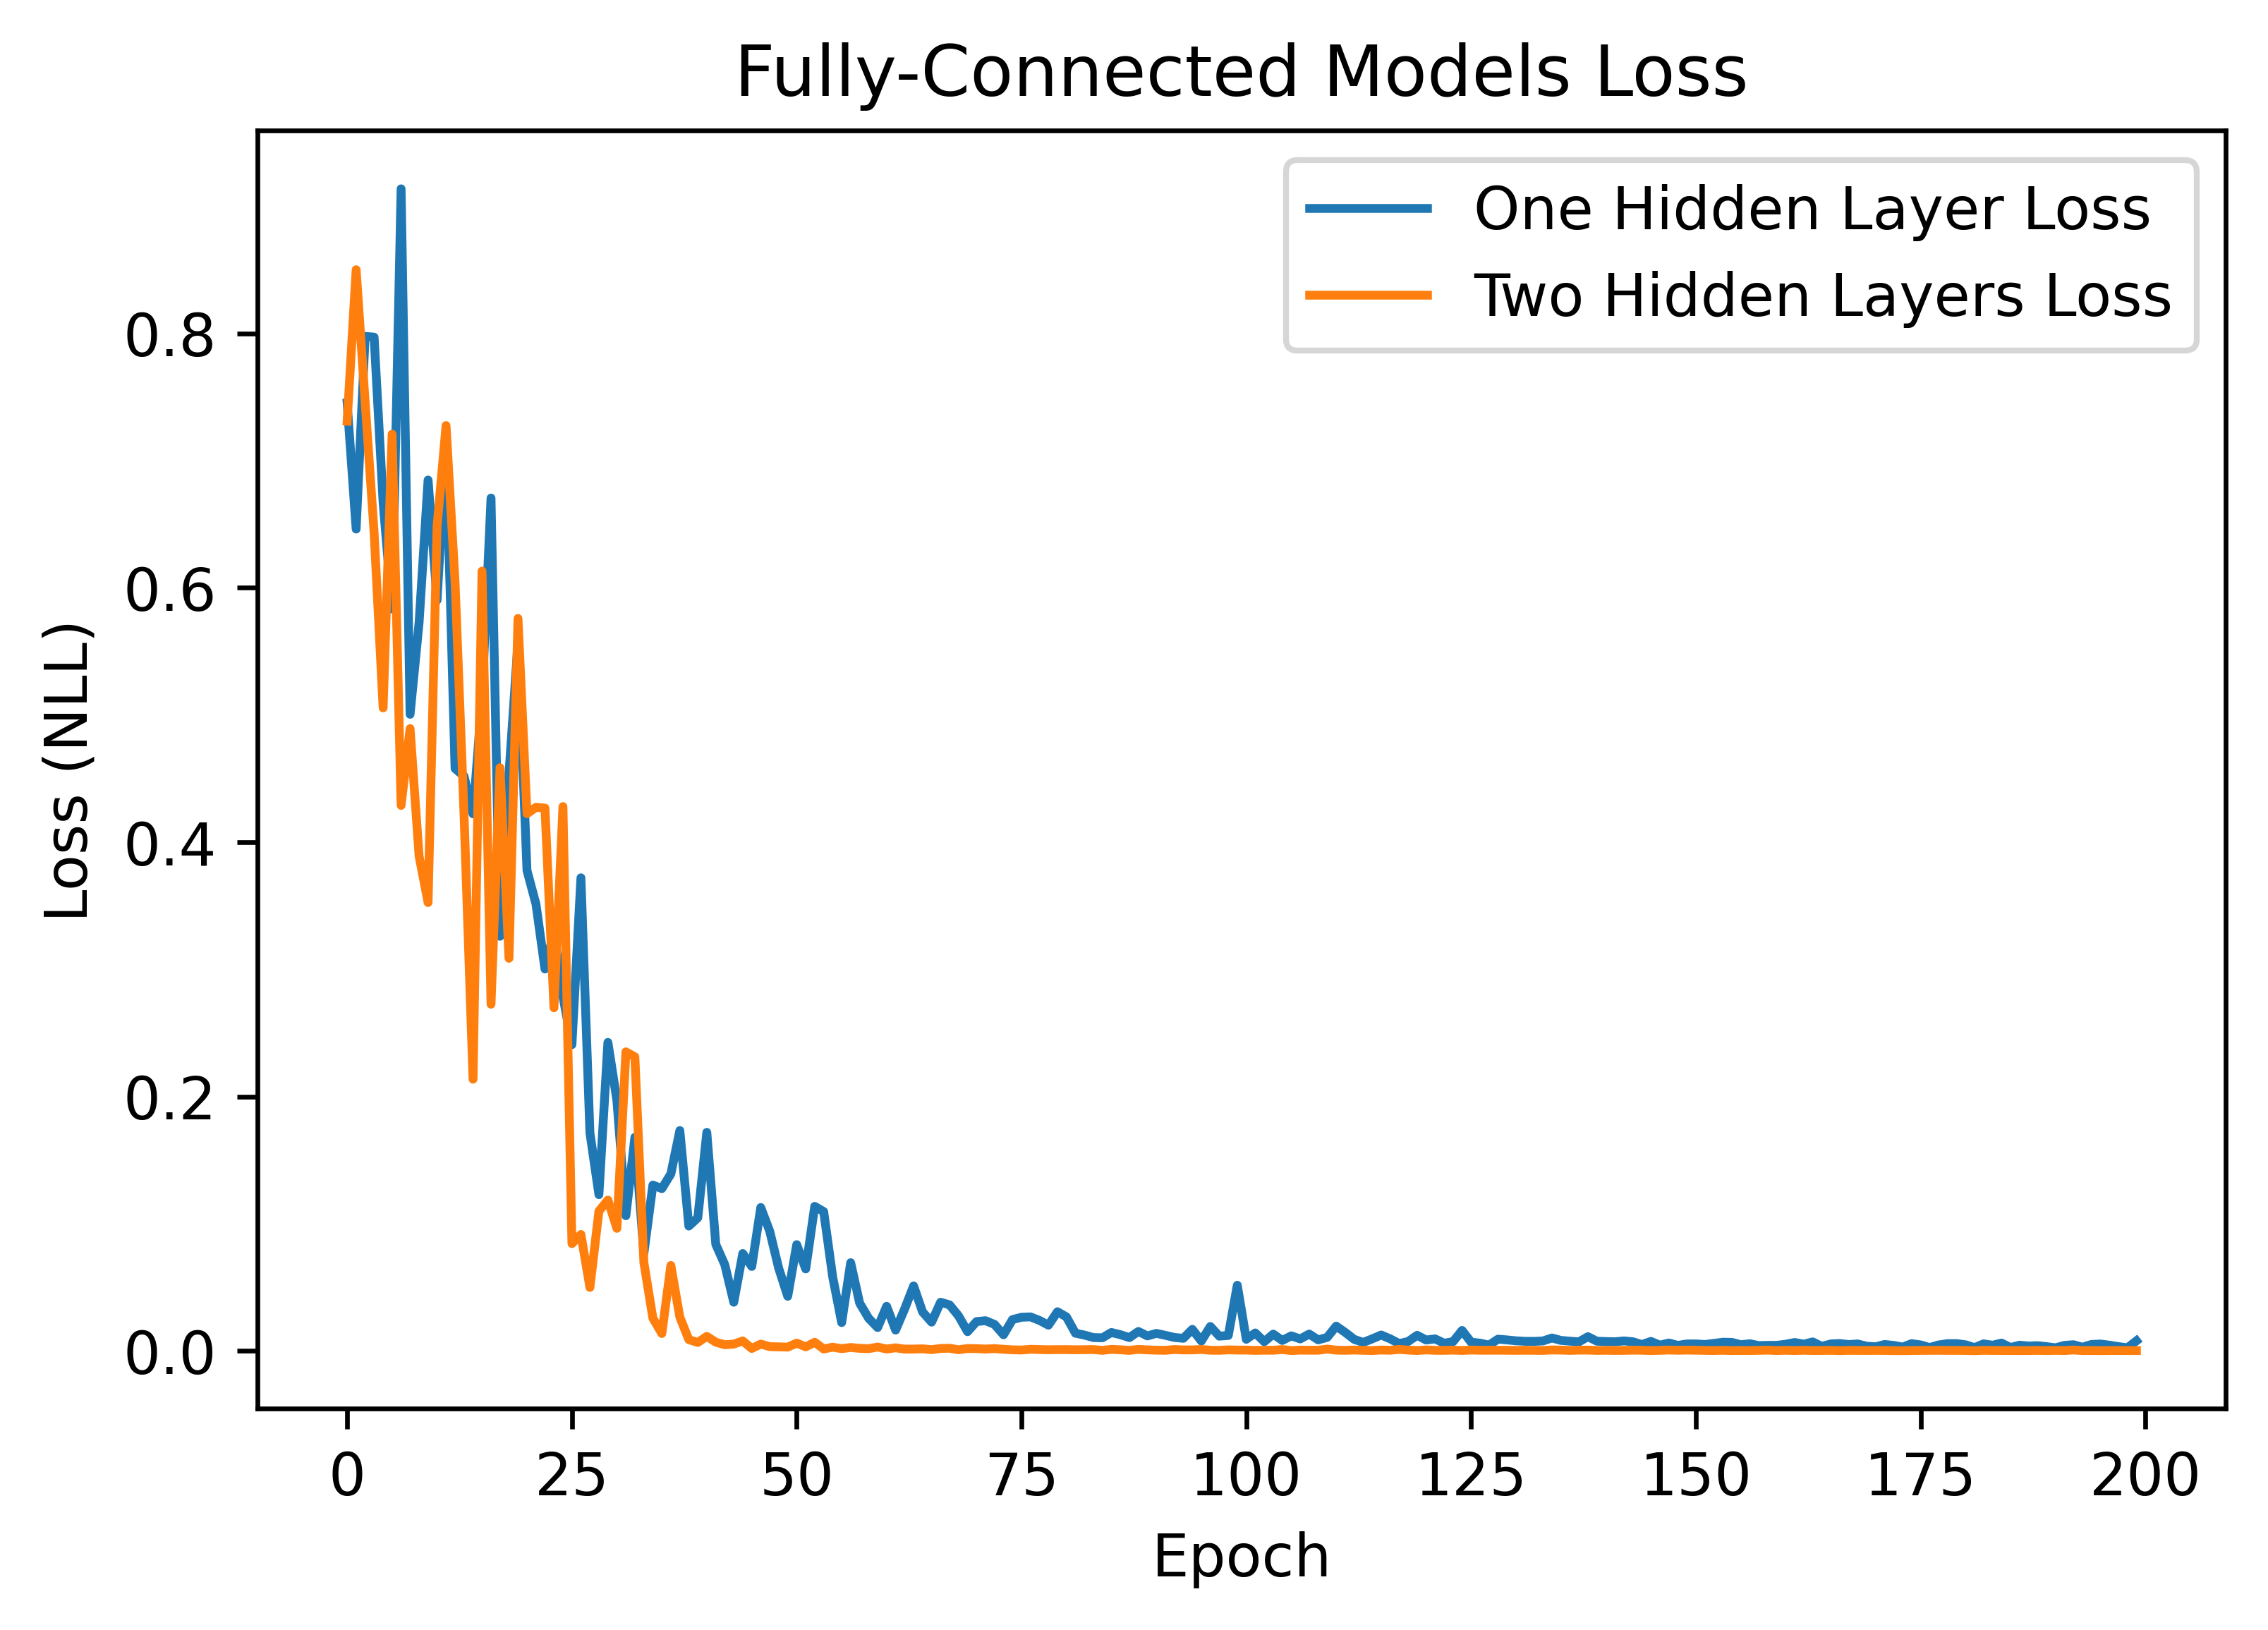

In [ ]:
# Set up figure for loss visualization
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (NLL)")
parta, = plt.plot(*zip(*losses))  # Plot loss from part a
partb, = plt.plot(*zip(*losses_hidden)) # Plot loss from part b
plt.legend([parta, partb], ['One Hidden Layer Loss', 'Two Hidden Layers Loss'])
plt.title("Fully-Connected Models Loss")
plt.savefig("FC loss.png", format="png")